# PROBLEM STATEMENT

**"Implement pre-trained VGG - 16 to perform classification
using with and without trainable layers"**

In [ ]:
!unzip ./cats_dogs_small.zip

### Importing the Modules

In [42]:
from keras.applications import VGG16

import numpy as np, pandas as pd, matplotlib.pyplot as plt, random

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Input
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

- using the existing Keras VGG-16 Model
- can't update or customize weights and parameters at various layers

### Loading the pre-built model

In [43]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape = (150,150,3))

In [44]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### Defining our New Architecture



In [45]:
x = Flatten()(conv_base.output)

prediction = Dense(1, activation='sigmoid')(x)

In [46]:
model = Model(inputs=conv_base.input, outputs=prediction)

In [47]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [48]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### Image Augmentation

In [49]:
train_path = "/content/catsAndDogs40/train"
test_path = "/content/catsAndDogs40/test"

In [50]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [51]:
training_set = train_datagen.flow_from_directory(train_path, target_size=(150,150), batch_size=20, class_mode='binary')

test_set = test_datagen.flow_from_directory(test_path, target_size=(150,150), batch_size=20, class_mode='binary')

Found 64 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Model Training

In [52]:
hist = model.fit(
    training_set, validation_data=test_set, epochs = 25, steps_per_epoch=len(training_set), validation_steps=len(test_set)
)

Epoch 1/25
4/4 [==============================] - 5s 280ms/step - loss: 5.3037 - accuracy: 0.4531 - val_loss: 4.9263 - val_accuracy: 0.5000
Epoch 2/25
4/4 [==============================] - 1s 141ms/step - loss: 2.5083 - accuracy: 0.4375 - val_loss: 0.6774 - val_accuracy: 0.7500
Epoch 3/25
4/4 [==============================] - 1s 241ms/step - loss: 0.7392 - accuracy: 0.4219 - val_loss: 0.6835 - val_accuracy: 0.4375
Epoch 4/25
4/4 [==============================] - 1s 148ms/step - loss: 0.7635 - accuracy: 0.3906 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 5/25
4/4 [==============================] - 1s 146ms/step - loss: 0.6960 - accuracy: 0.5312 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 6/25
4/4 [==============================] - 1s 145ms/step - loss: 0.7011 - accuracy: 0.5000 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 7/25
4/4 [==============================] - 1s 205ms/step - loss: 0.7083 - accuracy: 0.4219 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 8/25
4/4 [====

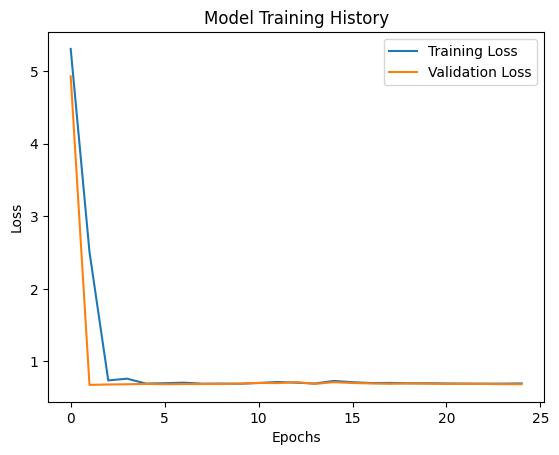

In [53]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training History')
plt.legend()
plt.show()

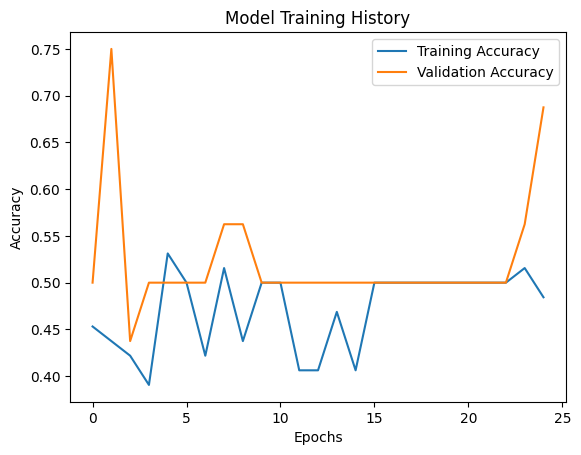

In [54]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Training History')
plt.legend()
plt.show()

### Prediction on a non-dataset image

In [67]:
img_path = 'dog-test1.jpg'
img = image.load_img(img_path, target_size=(150, 150))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

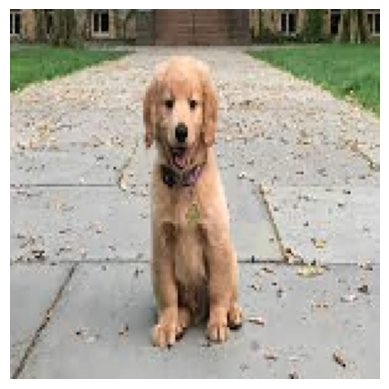

In [68]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [69]:
preds = model.predict(img_array)
print(preds[0][0])

if preds[0] < 0.5:
  print("CAT")
else:
  print("DOG")

1/1 [==============================] - 0s 39ms/step
0.5581799
DOG
